In [1]:
%matplotlib inline

# Extract texture features

This example shows how to extract texture features from the tissue
image.

Textures features give measure of how the image intensity at
different distances and angles varies by calculating a grey-level
co-occurrence matrix ([GLCM](https://en.wikipedia.org/wiki/Co-occurrence_matrix)). The GLCM
includes the number of times that grey-level $j$ occurs at a distance
$d$ and at an angle $\\theta$ from grey-level $i$. From this data,
different features (`props`) are calculated. See also
`skimage.feature.greycomatrix`.

Texture features are calculated by using `features = 'texture'`, which
calls `squidpy.im.ImageContainer.features_texture`. In addition to
`feature_name` and `channels`, we can also specify the following
`features_kwargs`:

> -   `distances` - distances that are taken into account for finding
>     repeating patterns.
> -   `angles` - range on which values are binned. Default is the whole
>     image range.
> -   `props` - texture features that are extracted from the GLCM.

::: seealso
See `sphx_glr_auto_examples_image_compute_features.py` for general usage
of `squidpy.im.calculate_image_features`.
:::


In [2]:
import squidpy as sq

Let\'s load the fluorescence Visium dataset and calculate texture
features with default `features_kwargs`.

Note that for texture features it may make sense to compute them over a
larger crop size to include more context, e.g., `spot_scale = 2` or
`spot_scale = 4` which will extract crops with double or four times the
radius than the original Visium spot size. For more details on the image
cropping, see `sphx_glr_auto_examples_image_compute_crops.py`.


In [ ]:
# get spatial dataset including high-resolution tissue image
img = sq.datasets.visium_fluo_image_crop()
adata = sq.datasets.visium_fluo_adata_crop()

In [4]:
img

ImageContainer[shape=(7272, 7272), layers=['image']]

In [5]:
adata

AnnData object with n_obs × n_vars = 704 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
# calculate texture features and save in key "texture_features"
sq.im.calculate_image_features(
    adata,
    img,
    features="texture",
    key_added="texture_features",
    spot_scale=2,
    show_progress_bar=False,
    n_jobs=8
)

The result is stored in `adata.obsm['texture_features']`.


In [7]:
adata.obsm

AxisArrays with keys: X_pca, X_umap, spatial, texture_features

In [8]:
adata.obsm["texture_features"].head()

,texture_ch-0_contrast_dist-1_angle-0.00,texture_ch-0_contrast_dist-1_angle-0.79,texture_ch-0_contrast_dist-1_angle-1.57,texture_ch-0_contrast_dist-1_angle-2.36,texture_ch-0_dissimilarity_dist-1_angle-0.00,texture_ch-0_dissimilarity_dist-1_angle-0.79,texture_ch-0_dissimilarity_dist-1_angle-1.57,texture_ch-0_dissimilarity_dist-1_angle-2.36,texture_ch-0_homogeneity_dist-1_angle-0.00,texture_ch-0_homogeneity_dist-1_angle-0.79,...,texture_ch-2_homogeneity_dist-1_angle-1.57,texture_ch-2_homogeneity_dist-1_angle-2.36,texture_ch-2_correlation_dist-1_angle-0.00,texture_ch-2_correlation_dist-1_angle-0.79,texture_ch-2_correlation_dist-1_angle-1.57,texture_ch-2_correlation_dist-1_angle-2.36,texture_ch-2_ASM_dist-1_angle-0.00,texture_ch-2_ASM_dist-1_angle-0.79,texture_ch-2_ASM_dist-1_angle-1.57,texture_ch-2_ASM_dist-1_angle-2.36
AAACGAGACGGTTGAT-1,42.783204,79.464035,41.904014,82.624826,1.983783,2.753093,1.973759,2.743151,0.753973,0.725217,...,0.570987,0.504941,0.883396,0.787901,0.872758,0.790485,0.040632,0.035577,0.041006,0.035397
AAAGGGATGTAGCAAG-1,82.756940,144.883230,76.546612,159.714604,3.349644,4.369327,3.171514,4.603538,0.692667,0.666414,...,0.538010,0.466651,0.938821,0.914061,0.947862,0.887927,0.016620,0.013672,0.016786,0.013555
AAATGGCATGTCTTGT-1,27.093979,48.276535,23.560334,49.362415,2.416785,3.209199,2.249740,3.271754,0.565910,0.525931,...,0.571515,0.503682,0.878716,0.781444,0.873200,0.786576,0.033804,0.028822,0.034247,0.028759
AAATGGTCAATGTGCC-1,24.198313,36.550901,18.040215,46.083141,2.222673,2.732854,1.925904,3.103483,0.645956,0.621034,...,0.578051,0.511233,0.988060,0.979815,0.987566,0.979121,0.016216,0.013678,0.016297,0.013659
AAATTAACGGGTAGCT-1,21.413928,39.826111,23.691475,47.908006,1.281552,1.779400,1.349581,1.883277,0.821503,0.798561,...,0.577136,0.507679,0.954380,0.926691,0.954430,0.922658,0.026097,0.022120,0.026564,0.022041


Use `squidpy.pl.extract` to plot the texture features on the tissue
image or have a look at [our interactive visualization
tutorial](../../external_tutorials/tutorial_napari.ipynb) to learn how
to use our interactive `napari` plugin. Here, we show the contrast
feature for channels 0 and 1. The two stains, DAPI in channel 0, and
GFAP in channel 1 show different regions of high contrast.


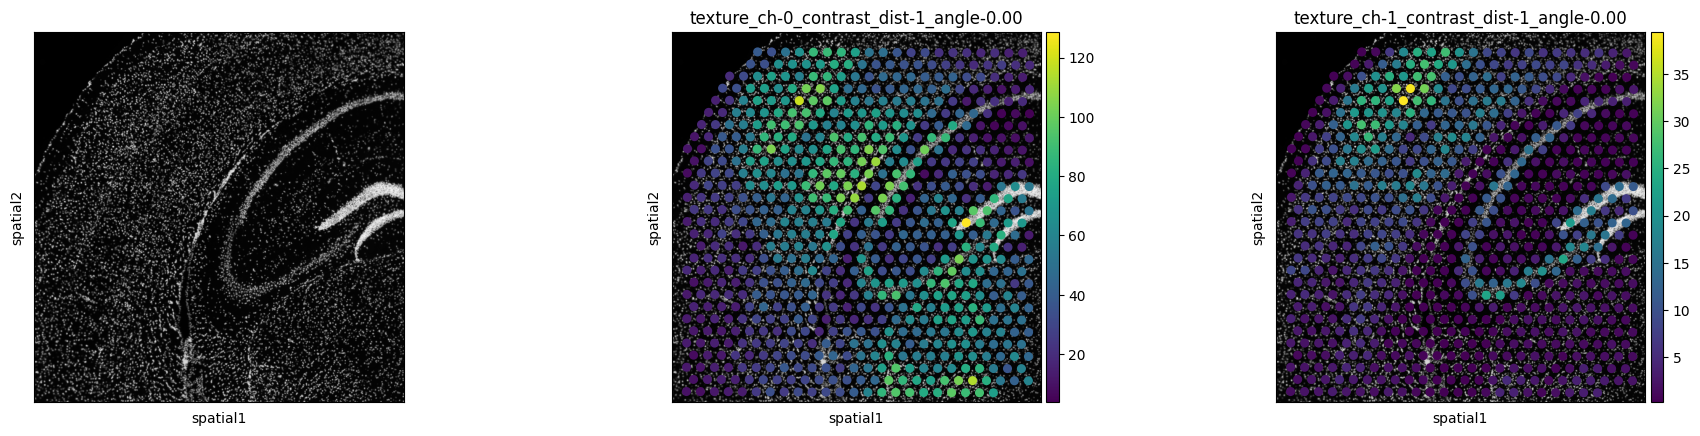

In [9]:
sq.pl.spatial_scatter(
    sq.pl.extract(adata, "texture_features"),
    color=[None, "texture_ch-0_contrast_dist-1_angle-0.00", "texture_ch-1_contrast_dist-1_angle-0.00"],
    img_cmap="gray",
)

> IDF: lets check out some parameters

In [12]:
sq.im.calculate_image_features(
    adata,
    img,
    features=['texture'],
    features_kwargs={
        'features': {
            'distances': [0, 500],
            'angles': [0, -1],
        }
    },
    show_progress_bar=False,
    key_added='texture_features2',
    n_jobs=8
)

In [13]:
adata.obsm

AxisArrays with keys: X_pca, X_umap, spatial, texture_features, texture_features2

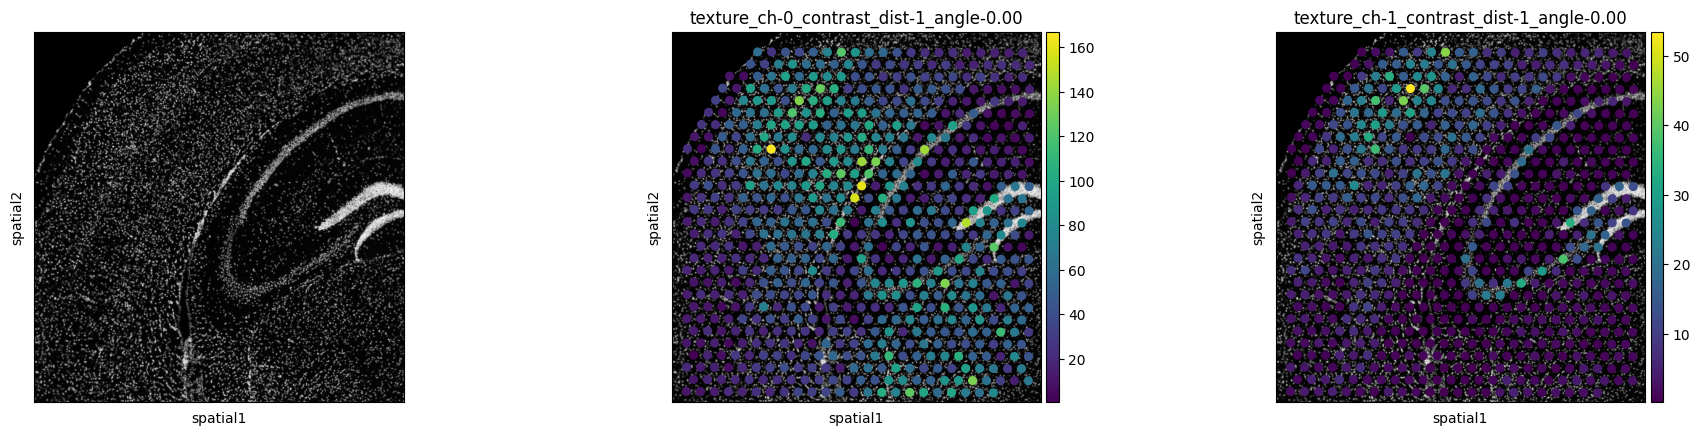

In [14]:
sq.pl.spatial_scatter(
    sq.pl.extract(adata, 'texture_features2'),
    color=[None, "texture_ch-0_contrast_dist-1_angle-0.00", "texture_ch-1_contrast_dist-1_angle-0.00"],
    img_cmap='gray'
)